In [9]:
!jupyter kernelspec list 

352.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Available kernels:
  pythonjvsc74a57bd0340155132ba56087f980cbce3982da26840d42a5262105d3e8f2a02dea5927f8    /Users/josephsd/.vscode/extensions/ms-toolsai.jupyter-2022.11.1003412109/temp/jupyter/kernels/pythonjvsc74a57bd0340155132ba56087f980cbce3982da26840d42a5262105d3e8f2a02dea5927f8
  python3                                                                               /Users/josephsd/Vault/env/share/jupyter/kernels/python3


In [4]:
import osmnx as ox

In [29]:
df = ox.geometries.geometries_from_place("Skokie IL",tags = {'place': ['village','city','town']})

In [30]:
df.shape

(8, 249)

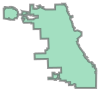

In [39]:
df.iloc[2].geometry

In [37]:
df['name']

element_type  osmid    
node          153509654          Skokie
relation      122052        Lincolnwood
              122604            Chicago
              123419           Evanston
              123452             Skokie
              123453       Morton Grove
              123455           Wilmette
              126586           Glenview
Name: name, dtype: object

In [36]:
df['place']

element_type  osmid    
node          153509654       town
relation      122052       village
              122604          city
              123419          city
              123452       village
              123453       village
              123455       village
              126586       village
Name: place, dtype: object

In [28]:
df.shape

(2, 20)

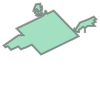

In [40]:
ox.geometries.geometries_from_place("potsdam ny",tags = {'place': ['village']}).iloc[0].geometry

In [3]:
import os
os.getenv("TEST_ENV")

'I_LOVE_YOU'

In [7]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk 

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap


from matplotlib import colors
import earthpy.spatial as es

path_prefix = '/Users/josephsd/Vault/sparrow/first_topo'


In [8]:

file = rasterio.open(f'{path_prefix}/data/30N000E_20101117_gmted_mea300.tif')
dataset = file.read()
print(dataset.shape)

(1, 2400, 3600)


In [173]:
file = rasterio.open(f'{path_prefix}/data/GRID1.tif')
file = rasterio.open('/Users/josephsd/Vault/sparrow/first_topo/data/30N000E_20101117_gmted_mea300.tif')
dataset = file.read()
print(dataset.shape)

(1, 2400, 3600)


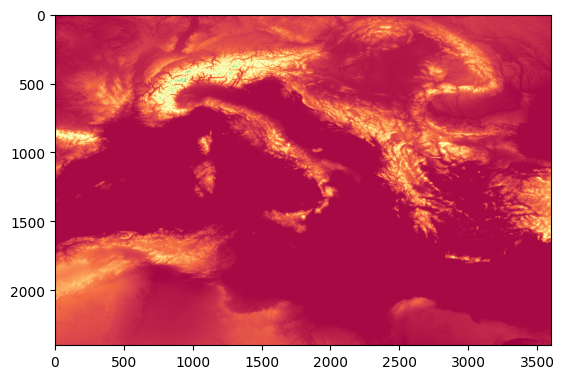

In [174]:
plt.imshow(dataset[0], cmap='Spectral')
plt.show()


In [64]:
print(dataset.shape)
print(np.amax(dataset))
print(np.amin(dataset))

(1, 16800, 43200)
8642
-430


In [128]:
df = gpd.read_file('data/countries/ne_10m_admin_0_countries.shp')


In [66]:
sorted(df.ADMIN.unique().tolist())

['Afghanistan',
 'Akrotiri Sovereign Base Area',
 'Aland',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Ashmore and Cartier Islands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bajo Nuevo Bank (Petrel Is.)',
 'Bangladesh',
 'Barbados',
 'Baykonur Cosmodrome',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bir Tawil',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brazilian Island',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Clipperton Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Coral Sea Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Cyprus No Mans Area',
 'Czechia',
 'Democratic Republic of t

In [154]:
romania = gpd.read_file('data/geoBoundries/geoBoundaries-ROU-ADM0.shp')

In [157]:
romania


,Shape_Leng,Shape_Area,shapeName,Level,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,35.558985,27.507571,Romania,ADM0,ROU,ROU-ADM0-16175383B41000772,ROU,ADM0,"MULTIPOLYGON (((28.98367 44.69244, 28.98491 44..."


In [147]:
from shapely.ops import unary_union


In [148]:
mergedPolys = unary_union(list(romania.geometry))

In [151]:
gpd.GeoDataFrame(data={"country":"romainia","geometry":mergedPolys})

ValueError: If using all scalar values, you must pass an index

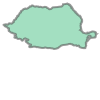

In [160]:
country='Romania'
italy = df.loc[df['ADMIN'] == country]
italy.iloc[0].geometry

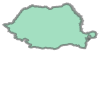

In [161]:
romania.iloc[0].geometry

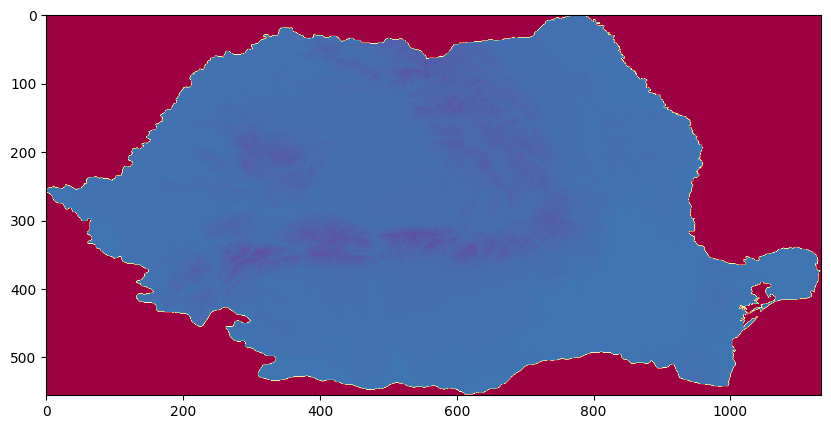

In [175]:
country='Romania'
italy = df.loc[df['ADMIN'] == country]
italy = romania
clipped_array, clipped_transform = msk.mask(file, [mapping(italy.iloc[0].geometry)], crop=True)

plt.figure(figsize=(10,10))
plt.imshow(clipped_array[0], cmap='Spectral')
plt.savefig("outputs/article_image_2.png", dpi=600, bbox_inches='tight')
plt.show()

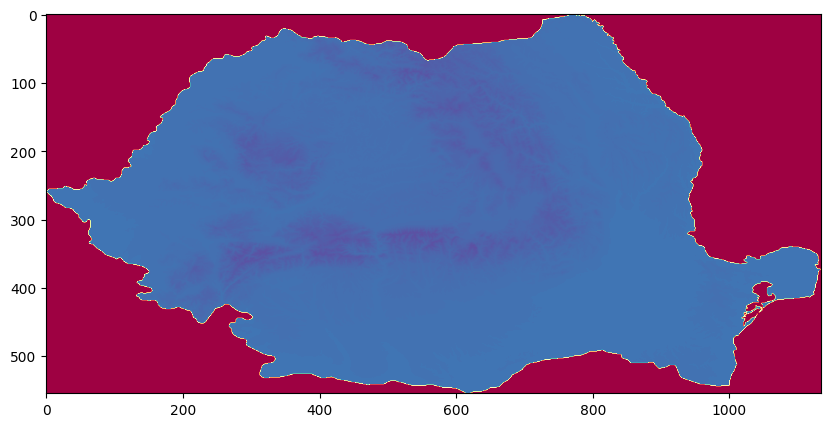

In [159]:
country='Romania'
italy = df.loc[df['ADMIN'] == country]
clipped_array, clipped_transform = msk.mask(file, [mapping(italy.iloc[0].geometry)], crop=True)

plt.figure(figsize=(10,10))
plt.imshow(clipped_array[0], cmap='Spectral')
plt.savefig("outputs/article_image_2.png", dpi=600, bbox_inches='tight')
plt.show()

In [162]:
def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], 
                                                          crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

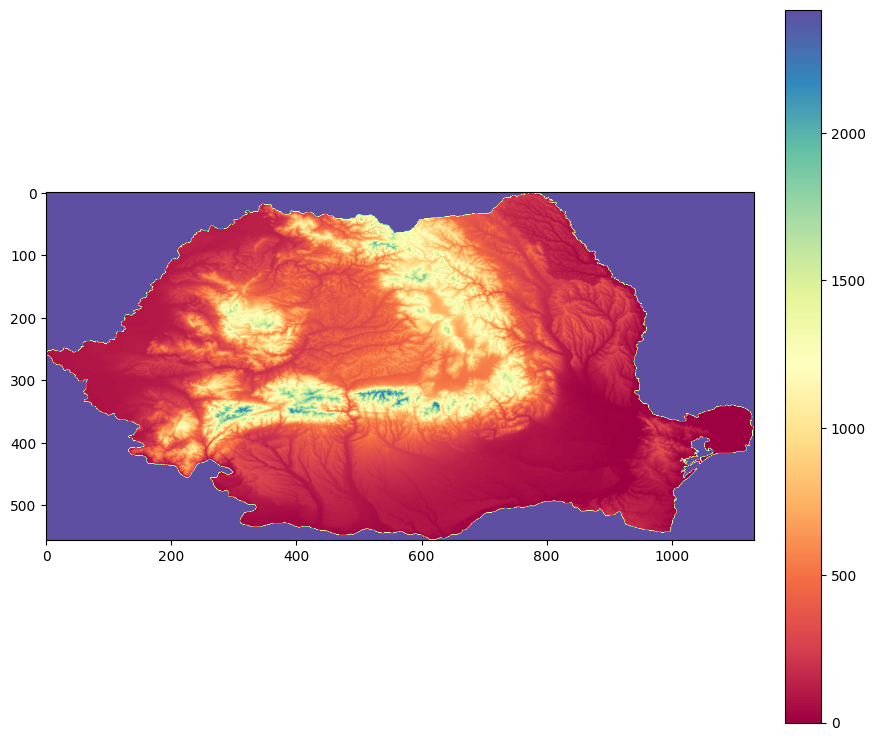

In [176]:
italy_topography, value_range = clip_raster(italy, file)

plt.figure(figsize=(10,10))
c = plt.imshow(italy_topography[0], cmap='Spectral')
plt.colorbar(c, fraction=0.046, pad=0.04)
plt.savefig("outputs/article_image_3.png", dpi=600, bbox_inches='tight')
plt.show()


In [164]:
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#cf2a32', '#CD212A'], N=value_range)
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#CD212A'], N=value_range)
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#000000', '#002fa7', '#0047ff', '#ffffff'], N=value_range)


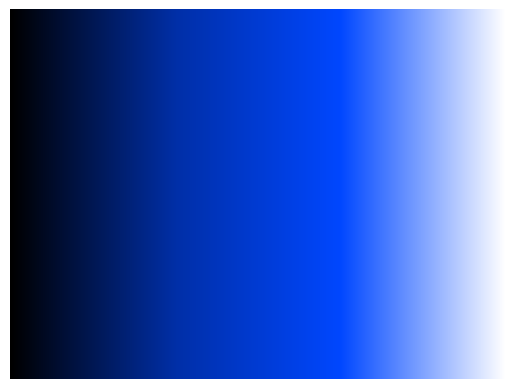

In [165]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=italy_colormap)
plt.axis('off')
plt.savefig("outputs/article_image_4.png", dpi=600, bbox_inches='tight')
plt.show()


In [166]:
background_color = np.array([1, 1, 1, 1.0])
newcolors = italy_colormap(np.linspace(0, 1, value_range))
newcolors = np.vstack((newcolors, background_color))
italy_colormap = ListedColormap(newcolors)



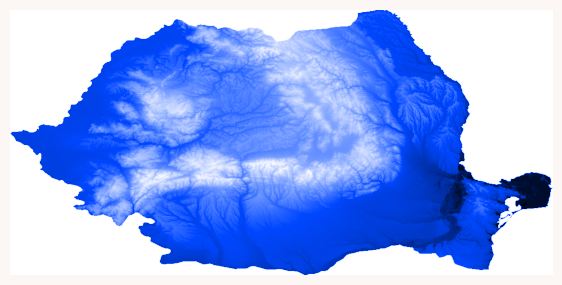

In [167]:
fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes()
plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
ax.axis('off')
plt.savefig("outputs/article_image_5.png", dpi=600, bbox_inches='tight')

plt.show()

In [168]:
hillshade = es.hillshade(italy_topography[0], azimuth=240, altitude=1)


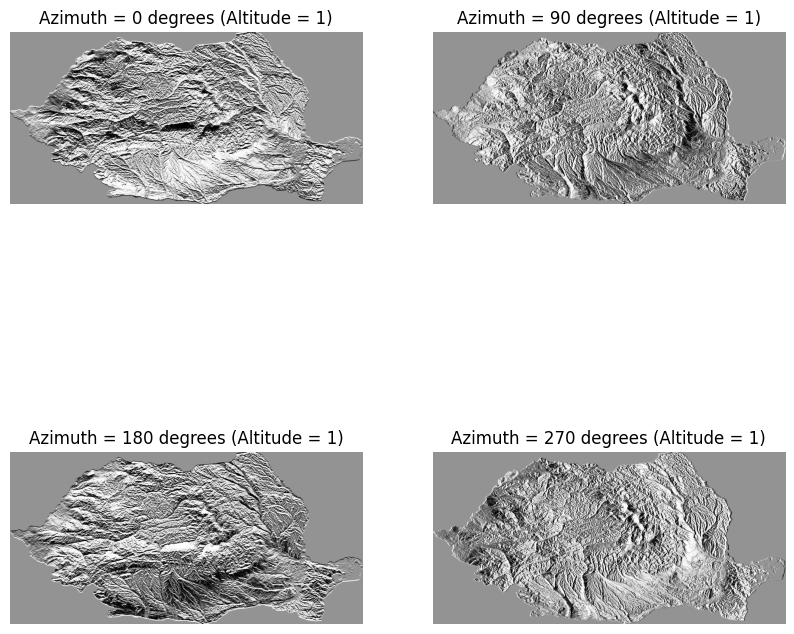

In [169]:
fig = plt.figure(figsize=(10, 10))
hillshade = es.hillshade(italy_topography[0], azimuth=0, altitude=1)
ax1 = plt.subplot(2,2,1)
ax1.imshow(hillshade, cmap="Greys")
ax1.axis('off')
ax1.set_title("Azimuth = 0 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=90, altitude=1)
ax2 = plt.subplot(2,2,2)
ax2.imshow(hillshade, cmap="Greys")
ax2.axis('off')
ax2.set_title("Azimuth = 90 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)
ax3 = plt.subplot(2,2,3)
ax3.imshow(hillshade, cmap="Greys")
ax3.axis('off')
ax3.set_title("Azimuth = 180 degrees (Altitude = 1)")

hillshade = es.hillshade(italy_topography[0], azimuth=270, altitude=1)
ax4 = plt.subplot(2,2,4)
ax4.imshow(hillshade, cmap="Greys")
ax4.axis('off')
ax4.set_title("Azimuth = 270 degrees (Altitude = 1)")

plt.savefig("outputs/article_image_6.png", dpi=600, bbox_inches='tight')
plt.show()


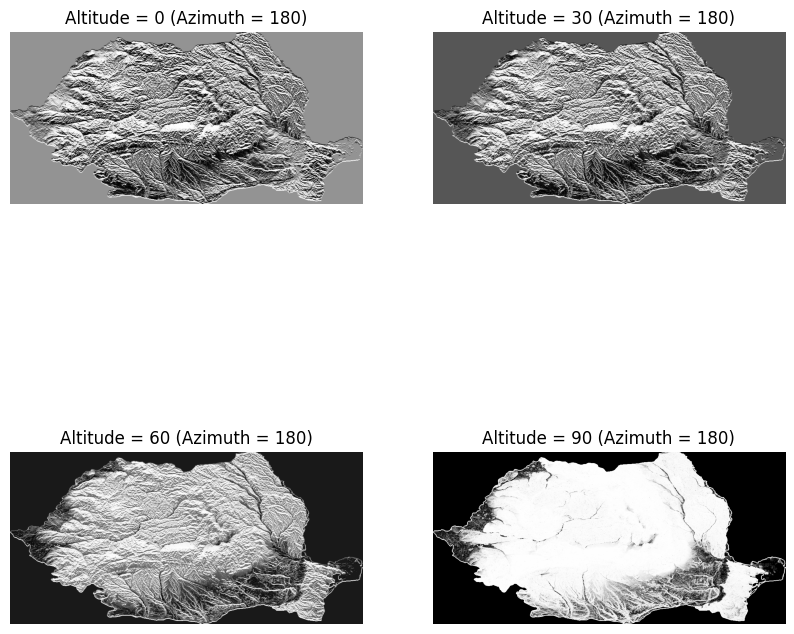

In [170]:
fig = plt.figure(figsize=(10, 10))
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)
ax1 = plt.subplot(2,2,1)
ax1.imshow(hillshade, cmap="Greys")
ax1.axis('off')
ax1.set_title("Altitude = 0 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=30)
ax2 = plt.subplot(2,2,2)
ax2.imshow(hillshade, cmap="Greys")
ax2.axis('off')
ax2.set_title("Altitude = 30 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=60)
ax3 = plt.subplot(2,2,3)
ax3.imshow(hillshade, cmap="Greys")
ax3.axis('off')
ax3.set_title("Altitude = 60 (Azimuth = 180)")

hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=90)
ax4 = plt.subplot(2,2,4)
ax4.imshow(hillshade, cmap="Greys")
ax4.axis('off')
ax4.set_title("Altitude = 90 (Azimuth = 180)")

plt.savefig("outputs/article_image_7.png", dpi=600, bbox_inches='tight')
plt.show()

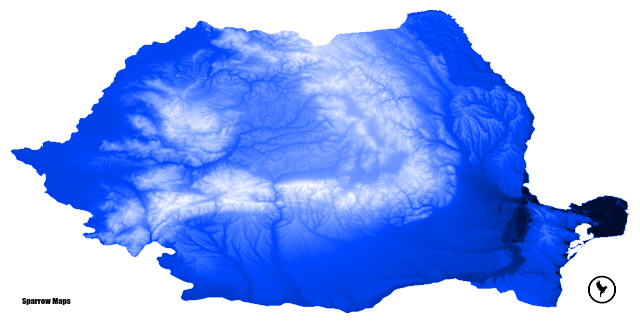

In [171]:
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
i = plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
# ax.imshow(hillshade, cmap="Greys", alpha=0.3)
ax.axis('off')

logo = plt.imread('../assets/img/logo.png')
newax = fig.add_axes([0.82, 0.20, 0.08, 0.08], anchor='SE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Sparrow Maps",
              size=6,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')


plt.savefig(f"outputs/{country}.png", dpi=600, bbox_inches='tight')
plt.show()

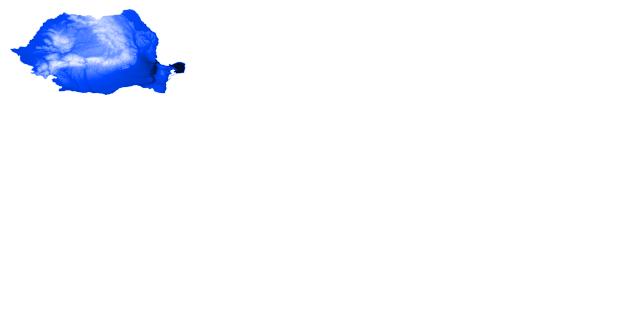

In [172]:
hillshade = es.hillshade(italy_topography[0], azimuth=180, altitude=1)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
i = plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
# ax.imshow(hillshade, cmap="Greys", alpha=0.3)
ax.axis('off')

ax.set_ylim(2000, 0)
ax.set_xlim(0, 4000)

plt.savefig("outputs/po_valley.png", dpi=600, bbox_inches='tight')
plt.show()